In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [3]:
!pip install pydot

You should consider upgrading via the 'C:\Users\Hp\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
from keras.utils.vis_utils import plot_model

In [5]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

In [6]:
path = os.path.join("images")

In [7]:
batch_size = 128

datagen_train      = ImageDataGenerator()

datagen_validation = ImageDataGenerator()

train_set      = datagen_train.flow_from_directory(path + "/train", target_size=(48, 48), color_mode = "grayscale", batch_size=batch_size, class_mode='categorical')
validation_set = datagen_validation.flow_from_directory(path + "/validation", target_size=(48, 48), color_mode = "grayscale", batch_size=batch_size, class_mode='categorical')

Found 28822 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [8]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [7]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_Stopping = EarlyStopping(monitor="val_loss",
                              min_delta=0,
                              verbose=1,
                              restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              verbose=1,
                              min_delta=0.001)


callbacks_list = [checkpoint,reduce_learningrate]

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(train_set,
                    steps_per_epoch=train_set.n//train_set.batch_size,
                    epochs=50,
                    validation_data = validation_set,
                    validation_steps = validation_set.n//validation_set.batch_size,
                    callbacks=callbacks_list
                    )

Epoch 1/50
225/225 [==============================] - 47s 196ms/step - loss: 1.4521 - accuracy: 0.4429 - val_loss: 1.3101 - val_accuracy: 0.5011 - lr: 0.0010
Epoch 2/50
225/225 [==============================] - 37s 162ms/step - loss: 1.2551 - accuracy: 0.5202 - val_loss: 1.2504 - val_accuracy: 0.5141 - lr: 0.0010
Epoch 3/50
225/225 [==============================] - 36s 161ms/step - loss: 1.1713 - accuracy: 0.5544 - val_loss: 1.1916 - val_accuracy: 0.5467 - lr: 0.0010
Epoch 4/50
225/225 [==============================] - 37s 162ms/step - loss: 1.1006 - accuracy: 0.5831 - val_loss: 1.1874 - val_accuracy: 0.5571 - lr: 0.0010
Epoch 5/50
225/225 [==============================] - 43s 190ms/step - loss: 1.0548 - accuracy: 0.6001 - val_loss: 1.2243 - val_accuracy: 0.5469 - lr: 0.0010
Epoch 6/50
225/225 [==============================] - 37s 164ms/step - loss: 0.9996 - accuracy: 0.6256 - val_loss: 1.0788 - val_accuracy: 0.5923 - lr: 0.0010
Epoch 7/50
225/225 [==============================] 

In [17]:
model.save_weights("models.h5")

In [18]:
model_json = model.to_json()

with open("model.json","w") as json_file:
    json_file.write(model_json)

In [19]:
from tensorflow.keras.models import model_from_json

with open("model.json","r") as json_file:
    loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)
    
    loaded_model.load_weights("models.h5")

In [81]:
prediction = loaded_model.predict(validation_set)[0]
labels_emotionals = ["biasa", "marah", "mual", "sedih", "senang", "takut", "terkejut"]

label = labels_emotionals[prediction.argmax()]

56/56 [==============================] - 7s 132ms/step


In [82]:
label

'sedih'

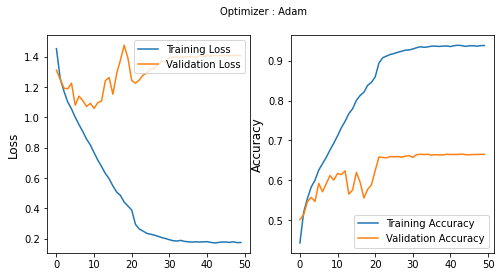

In [20]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=12)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=12)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [16]:
##Using VGG-16 Modern Arsitektur

vgg_model = tf.keras.applications.VGG16(
            weights="imagenet",
            input_shape=(48,48,3),
            include_top=False
)

vgg_model.trainable = False

In [17]:
# Create inputs with correct shape
inputs = vgg_model.input

x = vgg_model(inputs, training=False)

# Add pooling layer or flatten layer
x = tf.keras.layers.Flatten()(vgg_model.output)

# Add final dense layer
outputs = tf.keras.layers.Dense(no_of_classes, activation = 'softmax')(x)

# Combine inputs and outputs to create model
model_vgg_16_params = tf.keras.Model(inputs=inputs, outputs=outputs)

In [18]:
model_vgg_16_params.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

In [22]:
batch_size = 128

datagen_train      = ImageDataGenerator()

datagen_validation = ImageDataGenerator()

train_set_vgg      = datagen_train.flow_from_directory(path + "/train", target_size=(48, 48), color_mode = "rgb", batch_size=batch_size, class_mode='categorical')
validation_set_vgg = datagen_validation.flow_from_directory(path + "/validation", target_size=(48, 48), color_mode = "rgb", batch_size=batch_size, class_mode='categorical')

Found 28822 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
checkpoint_filepath = path+'modelvgg16/'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

model_vgg_16_params.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')

history_vgg16 = model_vgg_16_params.fit(train_set_vgg,
          validation_data=validation_set_vgg,
          steps_per_epoch=train_set_vgg.samples/train_set_vgg.batch_size,
          validation_steps=validation_set_vgg.samples/validation_set_vgg.batch_size,
          epochs=20,                           
          callbacks=[model_checkpoint_callback]
)

In [ ]:
#import numpy as np
#from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
img = image.load_img('29.jpg', target_size=(48,48,3))
x = image.img_to_array(img)
x  = x .flatten()
x = np.expand_dims(x, axis=0)
 
images = np.vstack([x])
pred = model.predict(images, batch_size=128)
pred_digits_number=np.argmax(pred,axis=1)[0]
print(pred_digits_number)

if pred_digits_number == 1:
  print('biasa')
elif pred_digits_number == 2:
  print('marah')
elif pred_digits_number == 3:
  print('mual')
elif pred_digits_number == 4:
  print('sedih')
elif pred_digits_number == 5:
  print('senang')
elif pred_digits_number == 6:
  print('takut')
elif pred_digits_number == 7:
  print('terkejut')

In [21]:
from tensorflow.keras.models import model_from_json
from time import sleep
from tensorflow.keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

deteksi_wajah = cv2.CascadeClassifier('haar.xml')

labels_emotionals = ["biasa", "marah", "mual", "sedih", "senang", "takut", "terkejut"]

with open("model.json","r") as json_file:
    loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)
    
    loaded_model.load_weights("models.h5")

cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()

    gray  = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    wajah = deteksi_wajah.detectMultiScale(gray)

    for(x,y,w,h) in wajah:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 255), 2)
        roi = gray[y:y+h, x:x+w]
        roi = cv2.resize(roi, (48,48), interpolation=cv2.INTER_AREA)

        if np.sum([roi]) != 0:
            roi_face = roi.astype('float')/255.0
            roi_face = img_to_array(roi_face)
            roi_face = np.expand_dims(roi_face, axis=0)

            prediction = loaded_model.predict(roi_face)[0]

            label = labels_emotionals[prediction.argmax()]
            label_position = (x, y-10)
            cv2.putText(frame, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,255,0), 2)
        else:
            cv2.putText(frame, "tidak terdeteksi", label_position, cv2.FONT_HERSHEY_SIMPLEX , 1, (0,255,255,0), 2)
    cv2.imshow('deteksi expresi wajah', frame)
    
    if cv2.waitKey(1) & 0xff == ord('q'):
        break

cap.release()
cap.destroyAllWindows()


1/1 [==============================] - 0s 27ms/step


KeyboardInterrupt: 